In [22]:
import numpy as np
import pandas as pa

In [23]:
data = pa.read_csv("./dataset/heart.csv")

In [24]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1,1
1,37,1,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2,1
2,41,0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2,1
3,56,1,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2,1
4,57,0,0.0,120.0,NaN,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3,0
299,45,1,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3,0
300,68,1,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3,0
301,57,1,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3,0


In [25]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        302 non-null    float64
 3   trestbps  288 non-null    float64
 4   chol      284 non-null    float64
 5   fbs       292 non-null    float64
 6   restecg   292 non-null    float64
 7   thalach   283 non-null    float64
 8   exang     289 non-null    float64
 9   oldpeak   298 non-null    float64
 10  slope     293 non-null    float64
 11  ca        299 non-null    float64
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 33.3 KB


In [27]:
#verifying null values
data.isna().sum()

age          0
sex          0
cp           1
trestbps    15
chol        19
fbs         11
restecg     11
thalach     20
exang       14
oldpeak      5
slope       10
ca           4
thal         0
target       0
dtype: int64

In [28]:
#handling missing values
data['cp']=data['cp'].fillna(data['cp'].mode()[0])
data['trestbps']=data['trestbps'].fillna(int(data['trestbps'].mean()))
data['chol']=data['chol'].fillna(int(data['chol'].mean()))
data['fbs']=data['fbs'].fillna(data['fbs'].mode()[0])
data['restecg']=data['restecg'].fillna(data['restecg'].mode()[0])
data['thalach']=data['thalach'].fillna(int(data['thalach'].mean()))
data['exang']=data['exang'].fillna(data['exang'].mode()[0])
data['oldpeak']=data['oldpeak'].fillna(int(data['oldpeak'].mean()))
data['slope']=data['slope'].fillna(data['slope'].mode()[0])
data['ca']=data['ca'].fillna(data['ca'].mode()[0])

In [29]:
#verifying null values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
num_tab = data.describe().columns.tolist()

In [31]:
num_tab

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sea

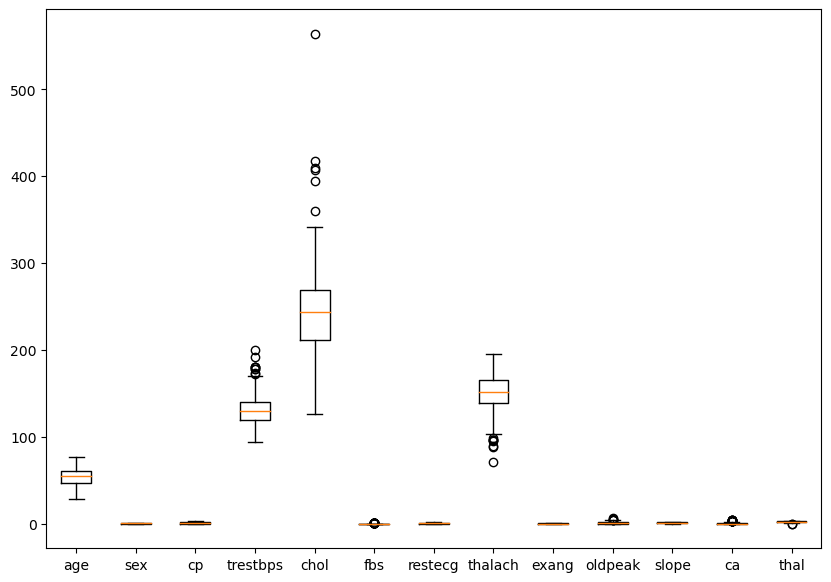

In [62]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
outtab = data[num_tab[:-1]]
plt.boxplot(outtab, labels = outtab.columns)
plt.show()

In [34]:
for i in outtab.columns.values:
    Q1,Q3 = np.percentile(outtab[i],[25,75])
    IQR = Q3 - Q1
    lf = Q1 - (1.5*IQR)
    hf = Q3 + (1.5*IQR)
    outtab.loc[outtab[i]>hf, i] = hf
    outtab.loc[outtab[i]<lf, i] = lf

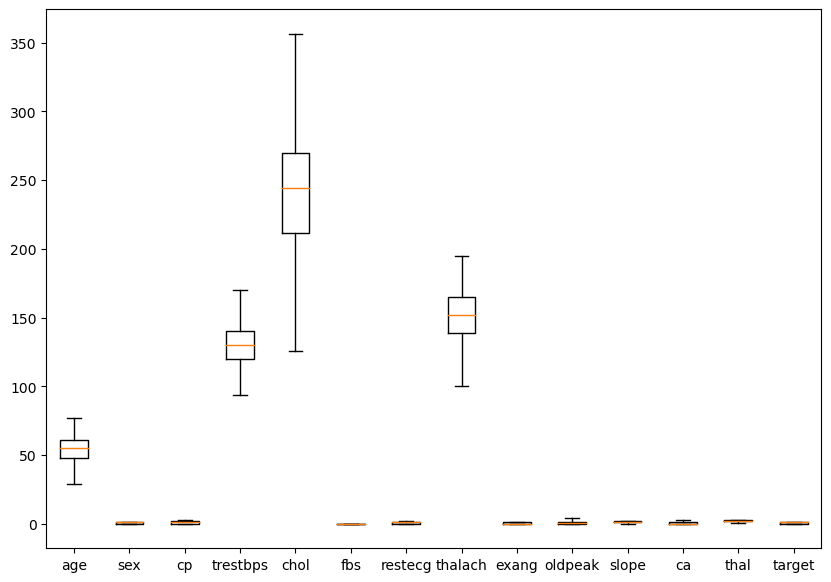

In [60]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(outtab, labels = data.columns)
plt.show()

In [36]:
outtab

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3.0,145.0,233.0,0.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,244.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0
300,68.0,1.0,0.0,144.0,193.0,0.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0


In [37]:
outtab['target'] = data['target']

In [38]:
outtab

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,0.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57.0,0.0,0.0,120.0,244.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0
300,68.0,1.0,0.0,144.0,193.0,0.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0


ValueError: num must be an integer with 1 <= num <= 12, not 13

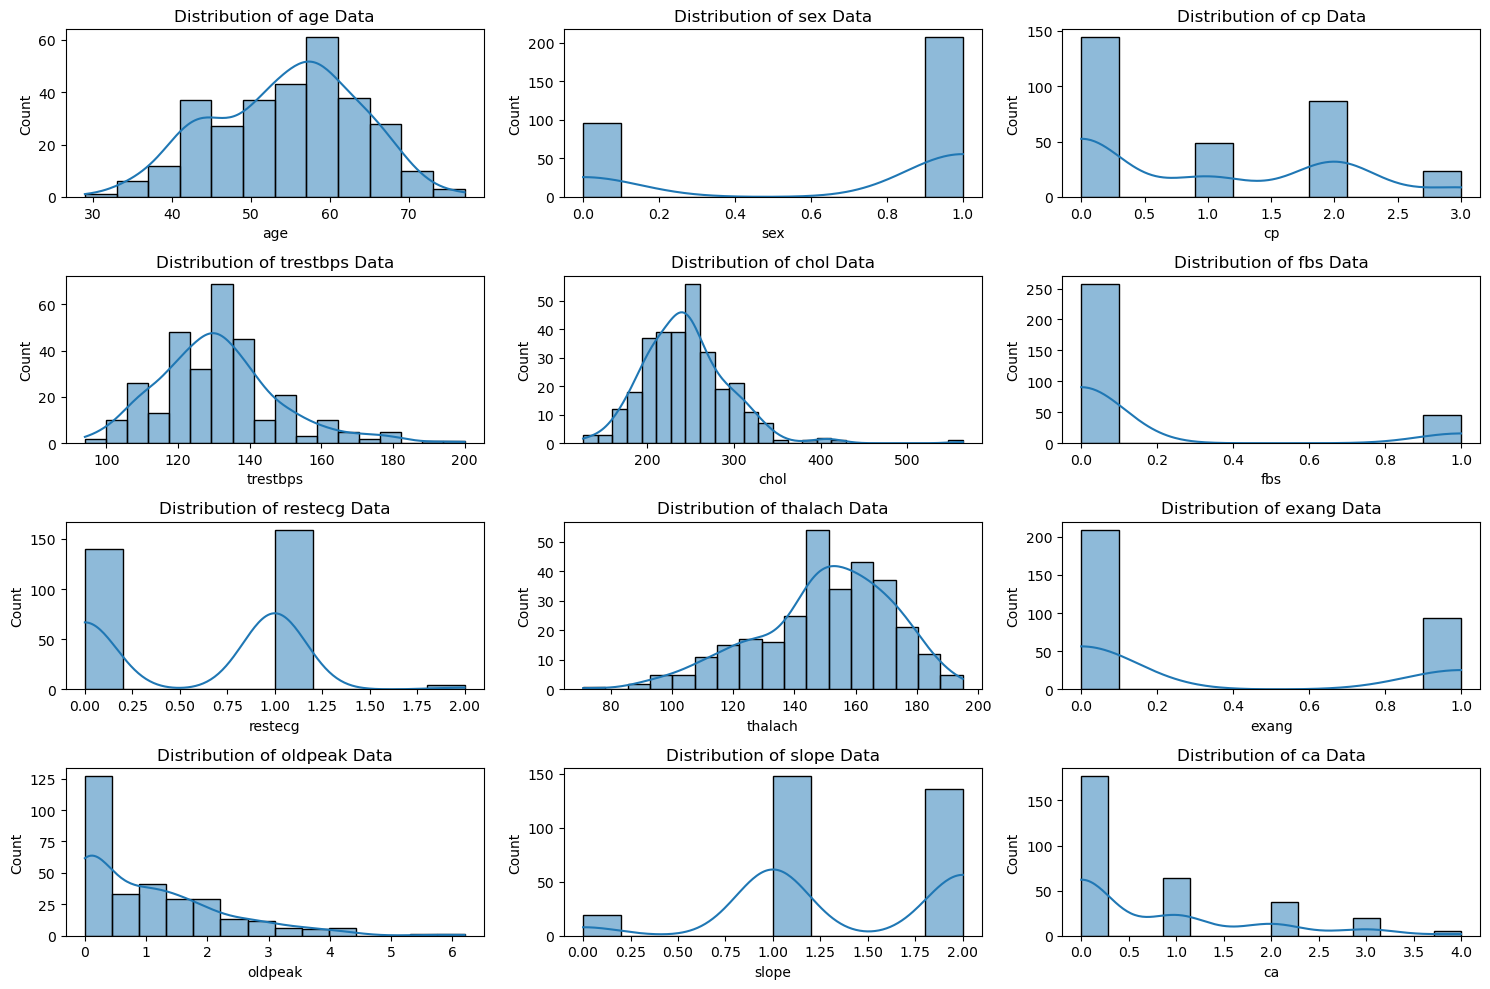

In [58]:
plt.figure(figsize=(15,10))
for i,col in enumerate(outtab.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

In [39]:
outtab.to_csv("./preprocess_dataset/heart_preprocess.csv", index = False)

In [48]:
cor = data.corr()

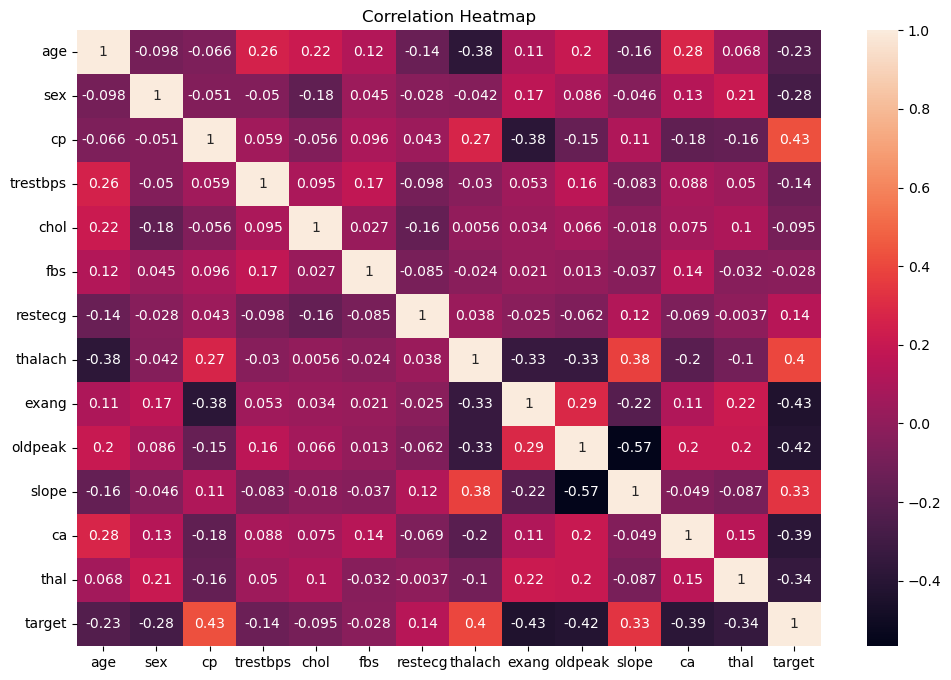

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='target', ylabel='count'>

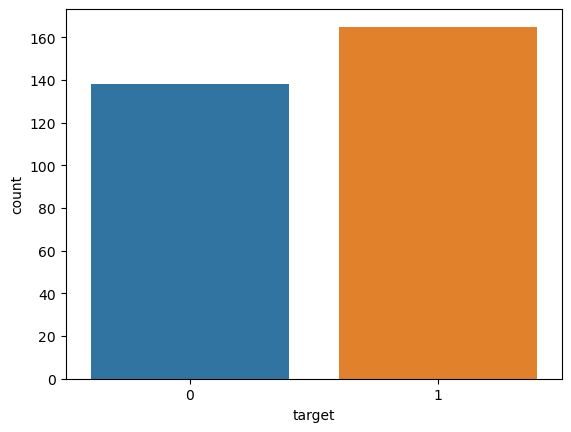

In [20]:
sea.countplot(data=data, x="target")

# Sleep Disorder

In [19]:
data = pa.read_csv("./dataset/Sleep_health_and_lifestyle_dataset.csv")

In [20]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [21]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [23]:
data = data.drop(columns = ['Person ID'])

In [24]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [25]:
#verifying null values
data.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [27]:
txt = data[['Gender', 'Occupation', 'BMI Category','Blood Pressure','Sleep Disorder']]

In [28]:
txt

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,Male,Software Engineer,Overweight,126/83,None
1,Male,Doctor,Normal,125/80,None
2,Male,Doctor,Normal,125/80,None
3,Male,Sales Representative,Obese,140/90,Sleep Apnea
4,Male,Sales Representative,Obese,140/90,Sleep Apnea
...,...,...,...,...,...
369,Female,Nurse,Overweight,140/95,Sleep Apnea
370,Female,Nurse,Overweight,140/95,Sleep Apnea
371,Female,Nurse,Overweight,140/95,Sleep Apnea
372,Female,Nurse,Overweight,140/95,Sleep Apnea


In [29]:
num = data.drop(columns = txt.columns)

In [30]:
num

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,27,6.1,6,42,6,77,4200
1,28,6.2,6,60,8,75,10000
2,28,6.2,6,60,8,75,10000
3,28,5.9,4,30,8,85,3000
4,28,5.9,4,30,8,85,3000
...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000
370,59,8.0,9,75,3,68,7000
371,59,8.1,9,75,3,68,7000
372,59,8.1,9,75,3,68,7000


In [31]:
txt

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,Male,Software Engineer,Overweight,126/83,None
1,Male,Doctor,Normal,125/80,None
2,Male,Doctor,Normal,125/80,None
3,Male,Sales Representative,Obese,140/90,Sleep Apnea
4,Male,Sales Representative,Obese,140/90,Sleep Apnea
...,...,...,...,...,...
369,Female,Nurse,Overweight,140/95,Sleep Apnea
370,Female,Nurse,Overweight,140/95,Sleep Apnea
371,Female,Nurse,Overweight,140/95,Sleep Apnea
372,Female,Nurse,Overweight,140/95,Sleep Apnea


In [32]:
txt_enc = pa.DataFrame()

In [33]:
for i in txt.columns:
    txt_enc[i] = pa.factorize(txt[i])[0]

In [34]:
txt_enc

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,0,0,0,0,0
1,0,1,1,1,0
2,0,1,1,1,0
3,0,2,2,2,1
4,0,2,2,2,1
...,...,...,...,...,...
369,1,4,0,22,1
370,1,4,0,22,1
371,1,4,0,22,1
372,1,4,0,22,1


In [35]:
txt['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
# Respectively
txt_enc['Gender'].unique()

array([0, 1], dtype=int64)

In [37]:
for i,j in zip(txt['Occupation'].unique(), txt_enc['Occupation'].unique()):
    print(f"{i} - {j}")

Software Engineer - 0
Doctor - 1
Sales Representative - 2
Teacher - 3
Nurse - 4
Engineer - 5
Accountant - 6
Scientist - 7
Lawyer - 8
Salesperson - 9
Manager - 10


In [38]:
for i,j in zip(txt['BMI Category'].unique(), txt_enc['BMI Category'].unique()):
    print(f"{i} - {j}")

Overweight - 0
Normal - 1
Obese - 2
Normal Weight - 3


In [39]:
for i,j in zip(txt['Sleep Disorder'].unique(), txt_enc['Sleep Disorder'].unique()):
    print(f"{i} - {j}")

None - 0
Sleep Apnea - 1
Insomnia - 2


In [40]:
Y = txt_enc["Sleep Disorder"]

In [41]:
txt_enc = txt_enc.drop(columns = ["Sleep Disorder"])

In [42]:
txt_enc

,Gender,Occupation,BMI Category,Blood Pressure
0,0,0,0,0
1,0,1,1,1
2,0,1,1,1
3,0,2,2,2
4,0,2,2,2
...,...,...,...,...
369,1,4,0,22
370,1,4,0,22
371,1,4,0,22
372,1,4,0,22


In [43]:
txt_enc = txt_enc.drop(columns = ['Blood Pressure'])

In [44]:
txt_enc

,Gender,Occupation,BMI Category
0,0,0,0
1,0,1,1
2,0,1,1
3,0,2,2
4,0,2,2
...,...,...,...
369,1,4,0
370,1,4,0
371,1,4,0
372,1,4,0


In [45]:
def preprocess_blood_pressure(blood_pressure):
    # Split the blood pressure string into systolic and diastolic readings
    sys = []
    dia = []
    for i in blood_pressure:
        systolic, diastolic = i.split('/')
        sys.append(int(systolic))
        dia.append(int(diastolic))


    return sys, dia

In [46]:
systolic, diastolic = preprocess_blood_pressure(txt['Blood Pressure'])

In [47]:
txt_enc['systolic'] = pa.Series(systolic)

In [48]:
txt_enc['diastolic'] = pa.Series(diastolic)

In [49]:
txt['Blood Pressure']

0      126/83
1      125/80
2      125/80
3      140/90
4      140/90
        ...  
369    140/95
370    140/95
371    140/95
372    140/95
373    140/95
Name: Blood Pressure, Length: 374, dtype: object

In [50]:
txt_enc

,Gender,Occupation,BMI Category,systolic,diastolic
0,0,0,0,126,83
1,0,1,1,125,80
2,0,1,1,125,80
3,0,2,2,140,90
4,0,2,2,140,90
...,...,...,...,...,...
369,1,4,0,140,95
370,1,4,0,140,95
371,1,4,0,140,95
372,1,4,0,140,95


In [51]:
csv = pa.concat([txt_enc, num, Y], axis = 1)

In [52]:
csv

,Gender,Occupation,BMI Category,systolic,diastolic,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder
0,0,0,0,126,83,27,6.1,6,42,6,77,4200,0
1,0,1,1,125,80,28,6.2,6,60,8,75,10000,0
2,0,1,1,125,80,28,6.2,6,60,8,75,10000,0
3,0,2,2,140,90,28,5.9,4,30,8,85,3000,1
4,0,2,2,140,90,28,5.9,4,30,8,85,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,4,0,140,95,59,8.1,9,75,3,68,7000,1
370,1,4,0,140,95,59,8.0,9,75,3,68,7000,1
371,1,4,0,140,95,59,8.1,9,75,3,68,7000,1
372,1,4,0,140,95,59,8.1,9,75,3,68,7000,1


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sea

In [54]:
#verifying null values
csv.isna().sum()

Gender                     0
Occupation                 0
BMI Category               0
systolic                   0
diastolic                  0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [55]:
num_tab = csv.describe().columns.tolist()

In [56]:
num_tab

['Gender',
 'Occupation',
 'BMI Category',
 'systolic',
 'diastolic',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder']

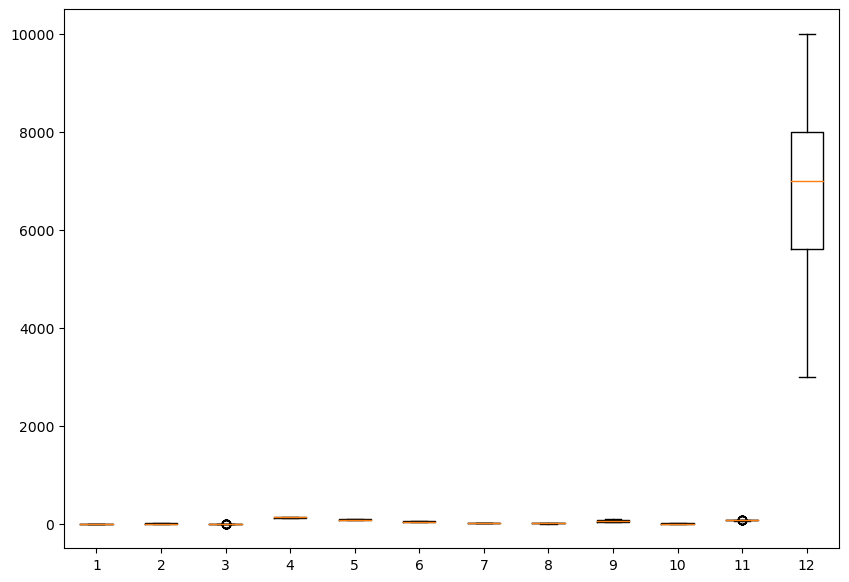

In [57]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
outtab = csv[num_tab[:-1]]
plt.boxplot(outtab)
plt.show()

In [58]:
for i in outtab.columns.values:
    Q1,Q3 = np.percentile(outtab[i],[25,75])
    IQR = Q3 - Q1
    lf = Q1 - (1.5*IQR)
    hf = Q3 + (1.5*IQR)
    outtab.loc[outtab[i]>hf, i] = hf
    outtab.loc[outtab[i]<lf, i] = lf

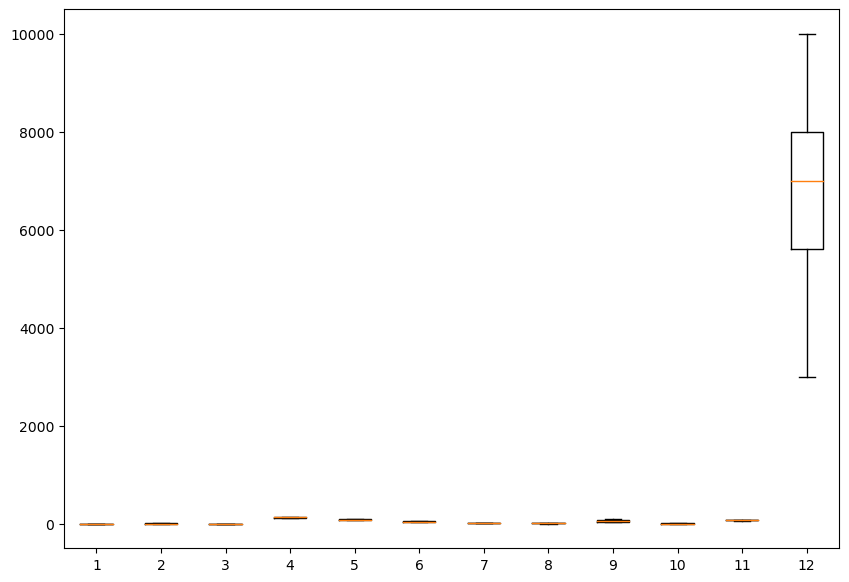

In [59]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(outtab)
plt.show()

In [60]:
outtab

,Gender,Occupation,BMI Category,systolic,diastolic,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,0.0,0.0,0.0,126.0,83.0,27.0,6.1,6.0,42.0,6.0,77.0,4200.0
1,0.0,1.0,1.0,125.0,80.0,28.0,6.2,6.0,60.0,8.0,75.0,10000.0
2,0.0,1.0,1.0,125.0,80.0,28.0,6.2,6.0,60.0,8.0,75.0,10000.0
3,0.0,2.0,2.0,140.0,90.0,28.0,5.9,4.0,30.0,8.0,78.0,3000.0
4,0.0,2.0,2.0,140.0,90.0,28.0,5.9,4.0,30.0,8.0,78.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.0,4.0,0.0,140.0,95.0,59.0,8.1,9.0,75.0,3.0,68.0,7000.0
370,1.0,4.0,0.0,140.0,95.0,59.0,8.0,9.0,75.0,3.0,68.0,7000.0
371,1.0,4.0,0.0,140.0,95.0,59.0,8.1,9.0,75.0,3.0,68.0,7000.0
372,1.0,4.0,0.0,140.0,95.0,59.0,8.1,9.0,75.0,3.0,68.0,7000.0


In [61]:
outtab['Sleep Disorder'] = csv['Sleep Disorder']

In [62]:
outtab

,Gender,Occupation,BMI Category,systolic,diastolic,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder
0,0.0,0.0,0.0,126.0,83.0,27.0,6.1,6.0,42.0,6.0,77.0,4200.0,0
1,0.0,1.0,1.0,125.0,80.0,28.0,6.2,6.0,60.0,8.0,75.0,10000.0,0
2,0.0,1.0,1.0,125.0,80.0,28.0,6.2,6.0,60.0,8.0,75.0,10000.0,0
3,0.0,2.0,2.0,140.0,90.0,28.0,5.9,4.0,30.0,8.0,78.0,3000.0,1
4,0.0,2.0,2.0,140.0,90.0,28.0,5.9,4.0,30.0,8.0,78.0,3000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.0,4.0,0.0,140.0,95.0,59.0,8.1,9.0,75.0,3.0,68.0,7000.0,1
370,1.0,4.0,0.0,140.0,95.0,59.0,8.0,9.0,75.0,3.0,68.0,7000.0,1
371,1.0,4.0,0.0,140.0,95.0,59.0,8.1,9.0,75.0,3.0,68.0,7000.0,1
372,1.0,4.0,0.0,140.0,95.0,59.0,8.1,9.0,75.0,3.0,68.0,7000.0,1


In [63]:
outtab.to_csv("./preprocess_dataset/sleep_preprocess.csv", index = False)